## Code to mask Deep lines 

Grey out regions when telluric lines are deeper than 5%.


In [29]:
### Load modules and Bokeh
# Imports from __future__ in case we're running Python 2
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting
%config InlineBackend.figure_formats = {'svg',}
# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [30]:
import Obtain_Telluric as obt

In [89]:

tapas_all = "../HD30501_data/1/tapas_2012-04-07T00-24-03_ReqId_10_R-50000_sratio-10_barydone-NO.ipac"

tapas_all_data, tapas_all_hdr = obt.load_telluric("", tapas_all)


deep_mask = tapas_all_data[1] < 0.9
new_wl = tapas_all_data[0][deep_mask] 
new_data = tapas_all_data[1][deep_mask] 

In [90]:
def line_edges(wl, I, lim=0.995):
    print(wl[1]-wl[0])
    wav_diff = wl[1]-wl[0]
    beginings = [wav2 for wav1, wav2 in zip(wl[:-1], wl[1:]) if wav2-wav1 > 3*np.abs(wav_diff)]
    ends = [wav1 for wav1, wav2 in zip(wl[:-1], wl[1:]) if wav2-wav1 > 3*np.abs(wav_diff)]
    
    beginings = [wl[0]] + beginings
    ends = ends + [wl[-1]]
    
    return beginings, ends

starts, ends = line_edges(new_wl, new_data)

print(len(vals))
print(starts, ends)

0.00422200000003
46
[2111.7641820000049, 2112.5072540000097, 2116.2015040000333, 2118.4813840000479, 2119.747984000056, 2120.064634000058, 2120.3559520000599, 2124.3837400000857, 2124.7088340000878, 2127.6600120001067, 2135.829582000159, 2149.884620000249, 2151.2989900002581, 2151.7043020002607, 2152.4093760002652, 2152.9160160002684, 2153.5070960002722, 2154.1995040002766, 2159.0463600003077, 2159.9583120003135, 2160.8702640003194, 2160.9167060003197, 2161.3937920003227, 2162.5632860003302, 2163.3316900003351, 2166.7557320003571, 2167.0766040003591, 2168.5965240003688] [2111.8992860000058, 2112.5790280000101, 2116.2310580000335, 2118.7009280000493, 2119.8113140000564, 2120.1110760000583, 2120.4066160000602, 2124.5230660000866, 2124.7890520000883, 2127.866890000108, 2135.9055780001595, 2149.9352840002493, 2151.446760000259, 2151.8225180002614, 2152.4727060002656, 2153.013122000269, 2153.5662040002726, 2154.2670560002771, 2159.1645760003084, 2160.0216420003139, 2160.8829300003194, 2160.

In [91]:
plt.plot(new_wl[:-1], new_wl[1:]-new_wl[:-1],".")
bokeh.plotting.show(bokeh.mpl.to_bokeh())

done


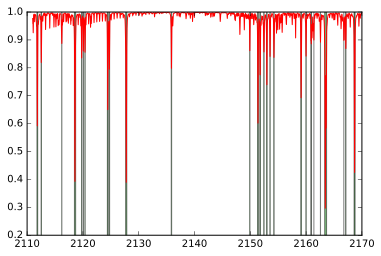

In [92]:
plt.plot(tapas_all_data[0], tapas_all_data[1], "-r", label="all")
#plt.plot(new_wl, new_data, "-k", label="all")

[plt.axvspan(start, end, facecolor='g', alpha=0.5) for start, end in zip(starts, ends)] 
#bokeh.plotting.show(bokeh.mpl.to_bokeh())

print("done")

In [94]:
# Bokeh example
from bokeh.plotting import figure, show, output_file
from bokeh.models import BoxAnnotation

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS)

p.line(tapas_all_data[0], tapas_all_data[1],
       line_color="gray", line_width=1, legend="Telluric")

Boxes = [BoxAnnotation(plot=p, left=start, right= end, fill_alpha=0.2, fill_color='red') for start, end in zip(starts, ends)]
#low_box = BoxAnnotation(plot=p, top=80, fill_alpha=0.1, fill_color='red')
#mid_box = BoxAnnotation(plot=p, bottom=80, top=180, fill_alpha=0.1, fill_color='green')
#high_box = BoxAnnotation(plot=p, bottom=180, fill_alpha=0.1, fill_color='red')

#p.renderers.extend([low_box, mid_box, high_box])
p.renderers.extend(Boxes)

p.title = "Telluric Spectra"
#p.xgrid[0].grid_line_color=None
#p.ygrid[0].grid_line_alpha=0.5
p.xaxis.axis_label = 'Wavelength'
p.yaxis.axis_label = 'Transmittance'

show(p)

## Define functions that can be used elseware

In [101]:
def bokeh_telluric_mask(fig, wl, I, mask_limit=0.9):
    """ For use with bokeh"""
    wl_mask = I < mask_limit
    mean_step = np.mean([wl[1]-wl[0], wl[-1]-wl[-2]])   # Average nominal step size
    starts, ends = mask_edges(wl[wl_mask], mean_step)
    Boxes = [BoxAnnotation(plot=p, left=start, right= end, fill_alpha=0.2, fill_color='red') for start, end in zip(starts, ends)]
    fig.renderers.extend(Boxes)
    
def matplotlib_telluric_mask(wl, I, mask_limit=0.9):
    """For use with matplotlib"""
    wl_mask = I < mask_limit
    mean_step = np.mean([wl[1]-wl[0], wl[-1]-wl[-2]])   # Average nominal step size
    starts, ends = mask_edges(wl[wl_mask], mean_step)
    [plt.axvspan(start, end, facecolor='g', alpha=0.5) for start, end in zip(starts, ends)] 
    
def mask_edges(wl, mean_step):
    beginings = [wav2 for wav1, wav2 in zip(wl[:-1], wl[1:]) if wav2-wav1 > 3*np.abs(mean_step)]
    ends = [wav1 for wav1, wav2 in zip(wl[:-1], wl[1:]) if wav2-wav1 > 3*np.abs(mean_step)]
    
    # prepend start of first line, and append end of last line
    beginings = [wl[0]] + beginings   # prepend starting value
    ends = ends + [wl[-1]] # append end value
    
    return beginings, ends


In [102]:
# Bokeh example with new function
from bokeh.plotting import figure, show, output_file
from bokeh.models import BoxAnnotation

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS)

p.line(tapas_all_data[0], tapas_all_data[1],
       line_color="olive", line_width=2, legend="Telluric")

bokeh_telluric_mask(p, tapas_all_data[0], tapas_all_data[1], mask_limit=0.9)


p.title = "Telluric Spectra"
#p.xgrid[0].grid_line_color=None
#p.ygrid[0].grid_line_alpha=0.5
p.xaxis.axis_label = 'Wavelength'
p.yaxis.axis_label = 'Transmittance'

show(p)

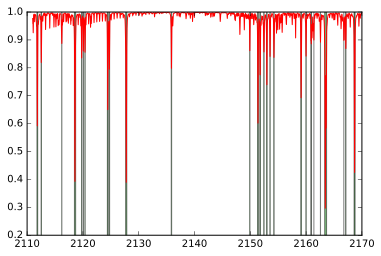

In [108]:
plt.plot(tapas_all_data[0], tapas_all_data[1], "-r", label="all")
#plt.plot(new_wl, new_data, "-k", label="all")

matplotlib_telluric_mask(tapas_all_data[0], tapas_all_data[1], mask_limit=0.9)
#bokeh.plotting.show(bokeh.mpl.to_bokeh())

plt.show()